In [3]:
# Importing Libraries
import pandas as pd  # This line imports the pandas library and assigns it to the alias 'pd'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
# Ensure the dataset URL is correct
url = "https://raw.githubusercontent.com/kevin1212kj/Cognifyz/refs/heads/main/Dataset%20.csv"
df = pd.read_csv(url)  # Now 'pd' is recognized and can be used to call the read_csv function

In [4]:
# Display Dataset Information
print("Dataset Preview:")
display(df.head())

Dataset Preview:


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
print("\nDataset Dimensions:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Dataset Dimensions:
Rows: 9551, Columns: 21


In [6]:
# Check for Duplicate Rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")


Duplicate Rows: 0


In [11]:
# Missing Values Summary
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Cuisines    9
dtype: int64


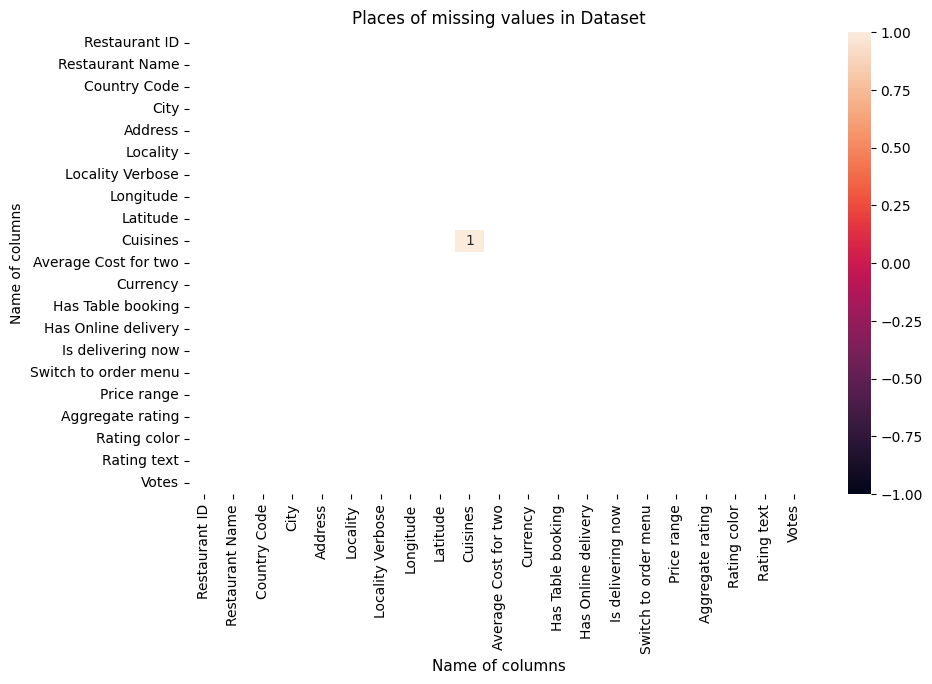

In [12]:
# Visualizing the missing values
# Checking Null Value by Plotting Heatmap

# Set the plot size
plt.figure(figsize = (10,6))

# Create the figure object
sns.heatmap(df.isnull().corr(), vmin=-1, annot= True)

# Set labels
plt.xlabel('Name of columns', fontsize=11)
plt.ylabel('Name of columns', fontsize=10)
plt.title('Places of missing values in Dataset', fontsize=12)

# To show
plt.show()

In [13]:
# If the null values number will high, then we can replace it with any placeholder value. In case if we drop them, we will loss a lot of data
# So, since Cuisines column have low number of missing values, that is only 9, i have dropping the same
df = df.dropna(subset=['Cuisines'])

In [14]:
# Checking missing values again for confirmation
print("Missing values/null values count after handling:")
df.isna().sum()

Missing values/null values count after handling:


,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [15]:
# Dataset Information
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [16]:
# Distribution of the target variable ("Aggregate rating") and identify class imbalance
target_counts = df['Aggregate rating'].value_counts()
print("Distribution of target variable:")
print(target_counts)

Distribution of target variable:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


### What did i found from the level 1 (task 1)?

* The Restuarant dataset consists of various restuarants information of different cities. Includes information such as restaurant name, city, address, locality, cuisines, rating and price range, among other things.
* There are 9551 rows and 21 columns provided in the data.
* Null values are only present in cuisines; Since there are only few null values present in cuisines (only 9) i will remove them from the data.
* No duplicate values exist.
* Data type conversion not required.
* Distribution of the target variable ("Aggregate rating") well balanced.

In [8]:
# Descriptive Statistics
print("\nDescriptive Statistics for Numeric Columns:")
print(df.describe())


Descriptive Statistics for Numeric Columns:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%

In [19]:
import pandas as pd

# Assuming 'df' is your DataFrame
numeric_columns = df.select_dtypes(include=['number']) # Select numerical columns from your DataFrame

# Individual statistics
# Calculate mean for numerical columns
mean = numeric_columns.mean()
print(f"Mean for numerical columns:\n{mean}")

Mean for numerical columns:
Restaurant ID           9.043301e+06
Country Code            1.817921e+01
Longitude               6.427500e+01
Latitude                2.584853e+01
Average Cost for two    1.200326e+03
Price range             1.804968e+00
Aggregate rating        2.665238e+00
Votes                   1.567721e+02
dtype: float64


In [20]:
# Calculate median for numerical columns
median = numeric_columns.median()
print(f"\nMedian for numerical columns:\n{median}")


Median for numerical columns:
Restaurant ID           6.002726e+06
Country Code            1.000000e+00
Longitude               7.719203e+01
Latitude                2.857044e+01
Average Cost for two    4.000000e+02
Price range             2.000000e+00
Aggregate rating        3.200000e+00
Votes                   3.100000e+01
dtype: float64


In [21]:
# Calculate standard deviation for numerical columns
std_dev = numeric_columns.std()
print(f"\nStandard deviation for numerical columns:\n{std_dev}")


Standard deviation for numerical columns:
Restaurant ID           8.791967e+06
Country Code            5.645160e+01
Longitude               4.119760e+01
Latitude                1.101009e+01
Average Cost for two    1.612874e+04
Price range             9.055631e-01
Aggregate rating        1.516588e+00
Votes                   4.302033e+02
dtype: float64


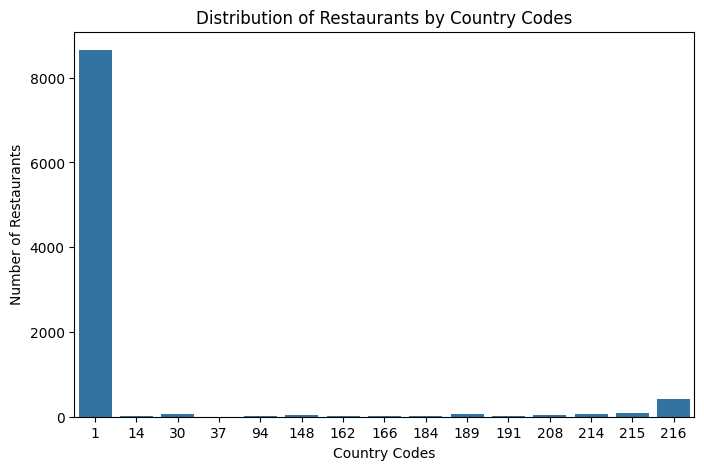

In [22]:
# Distribution of categorical variables like 'Country Code', 'City', and 'Cuisines'

# Count Plot Visualization Code for Country Codes
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
sns.countplot(x = df['Country Code'])

# Set Labels
plt.xlabel('Country Codes')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Country Codes')

# Display Chart
plt.show()

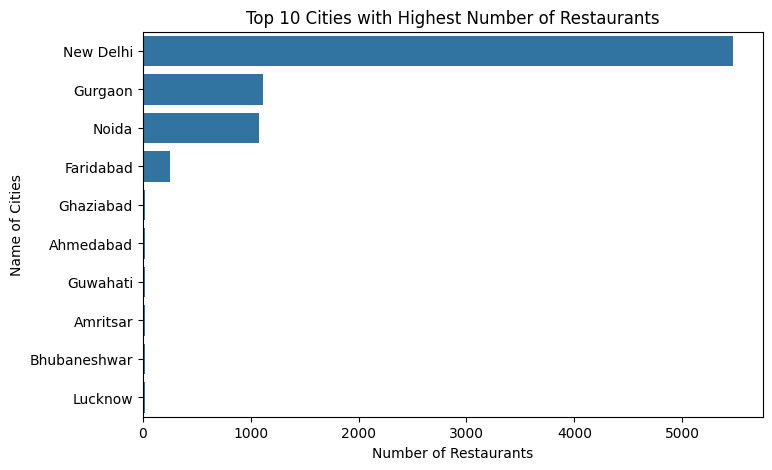

In [23]:
# Count Plot Visualization Code for Cities
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
# There are many cities names present in the data, so i select only the top 10 cities
sns.countplot(y = df['City'], order=df.City.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Top 10 Cities with Highest Number of Restaurants')

# Display Chart
plt.show()

In [24]:
# Identify the top 10 cities
top_cities = df['City'].value_counts().head(10)

# Display the results
print("Top 10 Cities with Highest Number of Restaurants:")
print(top_cities)

Top 10 Cities with Highest Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64


### What did i found from the level 1 (task 2)?

* Found the mean, median, mode values and other statistical measures for the numerical columns like 'Restaurant ID', 'Longitude', 'Latitude', 'Price range', etc.
* Country code 1 and 216 are with highest number of restaurants.
* New Delhi, Gurgaon and Noida are in top with highest number of restaurants.
* North Indian and Chinese cuisine are in top with highest number of restaurants.

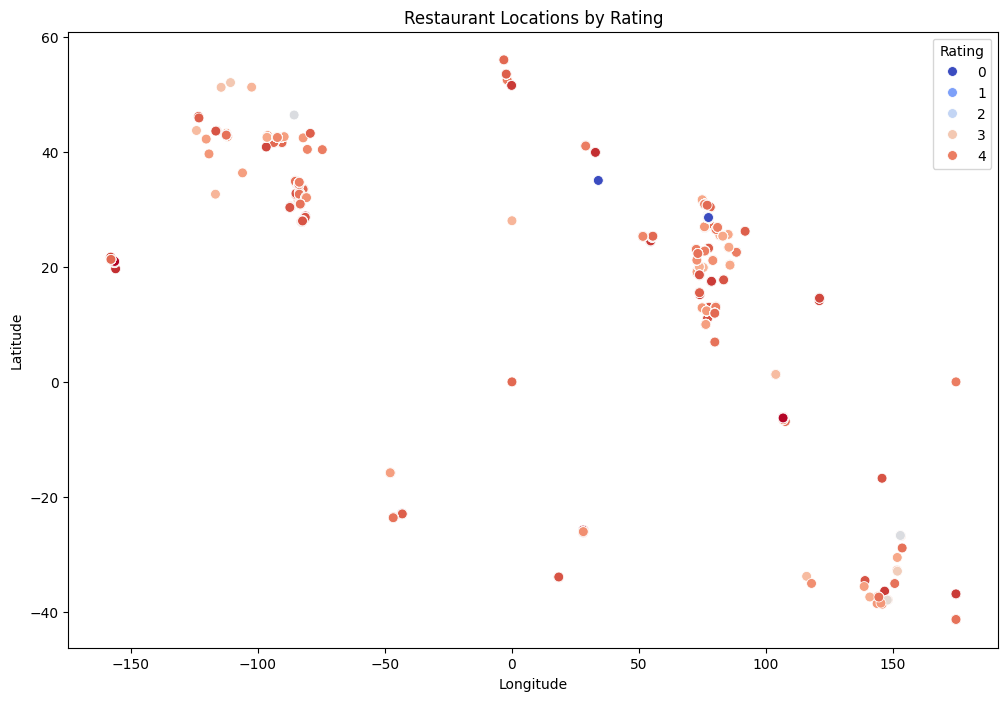


Analysis Complete!


In [32]:
# Geospatial Analysis: Map of Restaurant Locations
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x=df['Longitude'], y=df['Latitude'], hue=df['Aggregate rating'], palette="coolwarm", s=50
    )
    plt.title("Restaurant Locations by Rating")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(title="Rating", bbox_to_anchor=(1, 1))
    plt.show()

print("\nAnalysis Complete!")

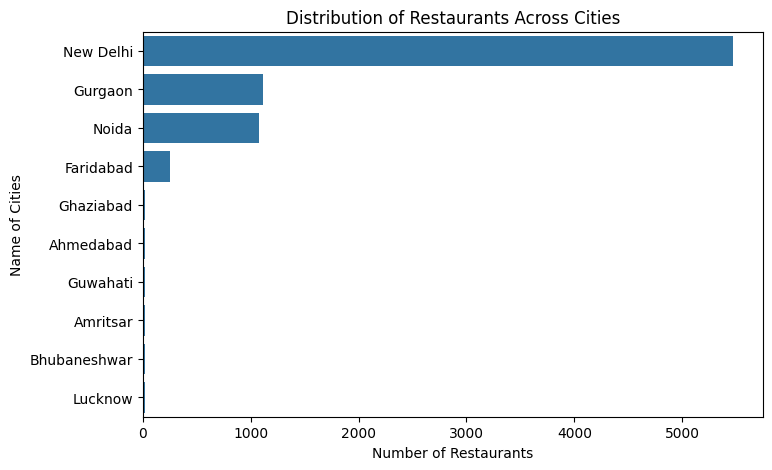

In [33]:
# Distribution of restaurants across different cities or countries
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
# There are many cities names present in the data, so i select only the top 10 cities
sns.countplot(y = df['City'], order=df.City.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Distribution of Restaurants Across Cities')

# Display Chart
plt.show()

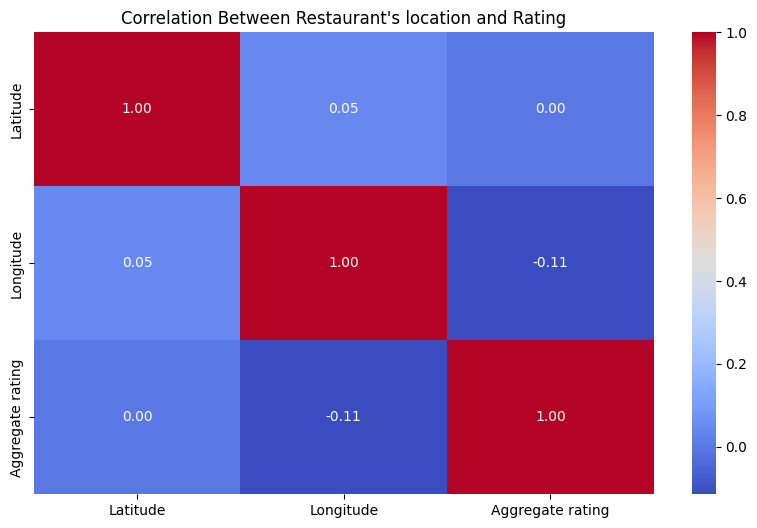

In [34]:
# Checking correlation between the restaurant's location and its rating
# Set plot size
plt.figure(figsize=(10, 6))

# Calculate the correlation between latitude, longitude, and ratings
correlation_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()

# Create a heatmap to visualize the correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set Title
plt.title("Correlation Between Restaurant's location and Rating")

# Display Chart
plt.show()

### What did i found from the level 1 (task 3)?

* North America and Asia(mainly India) have the most number of restaurants. Followed by Oceania and others.
* New Delhi have the most number of restaurants. Followed by Gurgaon, Noida and Faridabad.
* There is no correlation between  Latitude and Rating. But, Longitude and Rating are negatively correlated.
